<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Format-data" data-toc-modified-id="Format-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Format data</a></span></li><li><span><a href="#Host-tree-subsample" data-toc-modified-id="Host-tree-subsample-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Host tree subsample</a></span></li><li><span><a href="#PGLS" data-toc-modified-id="PGLS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>PGLS</a></span><ul class="toc-item"><li><span><a href="#Diet" data-toc-modified-id="Diet-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Diet</a></span><ul class="toc-item"><li><span><a href="#Saving-output" data-toc-modified-id="Saving-output-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Saving output</a></span></li><li><span><a href="#p-adjust" data-toc-modified-id="p-adjust-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>p-adjust</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Significant-taxa" data-toc-modified-id="Significant-taxa-7.1.4"><span class="toc-item-num">7.1.4&nbsp;&nbsp;</span>Significant taxa</a></span><ul class="toc-item"><li><span><a href="#Adding-taxonomy" data-toc-modified-id="Adding-taxonomy-7.1.4.1"><span class="toc-item-num">7.1.4.1&nbsp;&nbsp;</span>Adding taxonomy</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-7.1.4.2"><span class="toc-item-num">7.1.4.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li><li><span><a href="#Diet-distribution-of-sig-OTUs" data-toc-modified-id="Diet-distribution-of-sig-OTUs-7.1.5"><span class="toc-item-num">7.1.5&nbsp;&nbsp;</span>Diet distribution of sig OTUs</a></span></li><li><span><a href="#Host-distribution-of-sig.-OTUs" data-toc-modified-id="Host-distribution-of-sig.-OTUs-7.1.6"><span class="toc-item-num">7.1.6&nbsp;&nbsp;</span>Host distribution of sig. OTUs</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* PGLS on OTU pres/abs to determine correlations with diet when accounting for phylogeny

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS/'

# phyloseq
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

# host phylogeny
host_tree_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_IndD.nwk'

# params
threads = 12
sparsity_cutoff = 0.05

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ape)
library(phyloseq)
library(ade4)
library(ape)
library(caper)

source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 
source('/ebio/abt3_projects/Georg_animal_feces/code/itol.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: mvtnorm


In [3]:
set.seed(7342)

In [4]:
make_dir(work_dir)
setwd(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS/ 


 # Load

In [5]:
# phyloseq
physeq = readRDS(physeq_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

In [6]:
# sparsity cutoff
physeq = physeq %>%
    filter_taxa(function(x) sum(x > 0) / length(x) > sparsity_cutoff, TRUE) 
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 408 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 408 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 408 tips and 406 internal nodes ]

In [7]:
# transform to binomial
physeq = physeq %>%
    transform_sample_counts(function(x) ifelse(x > 0, 1, 0))
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 408 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 408 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 408 tips and 406 internal nodes ]

In [8]:
# metadata table
metadata = physeq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(X.SampleID = rownames(.)) %>%
    dplyr::select(X.SampleID, scientific_name, diet, 
                  diet_vertebrate,diet_invertebrate,diet_fruit,
                  diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,
                  diet_seeds,diet_grass_waterplants,diet_roots_tubers) %>%
    mutate(scientific_name = gsub(' ', '_', scientific_name)) %>%
    as.data.frame

rownames(metadata) = metadata$SampleID
metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213  11


X.SampleID,scientific_name,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers
X1.Eurasian.Beaver,Castor_fiber,herbivore,no,no,no,no,yes,no,yes,yes
X101.Horse,Equus_caballus,herbivore,no,no,no,no,no,yes,yes,no
X102.Kulan,Equus_hemionus,herbivore,no,no,no,no,yes,no,yes,no


In [9]:
# host tree file 
host_tree = read.tree(host_tree_file)
host_tree


Phylogenetic tree with 213 tips and 177 internal nodes.

Tip labels:
	X256.Zander, F302.Northern.Pike, X188.Brook.Trout, F300.Asp, X330.Ide, X327.Silver.Bream, ...
Node labels:
	Node1, Node2, Node3, Node4, Node5, Node6, ...

Rooted; includes branch lengths.

# Format data

In [10]:
otu = physeq %>%
    otu_table %>%
    as.matrix %>% 
    t %>% 
    as.data.frame

colnames(otu) = gsub('^([0-9])', 'X\\1', colnames(otu))
otu %>% dfhead

[1] 213 408


,X368bd5c2255f3a5ce0fef06ca6de1d04,X779324e5648460c5a67e577c45131b42,b918d185ee89a0b33d821ee766d76eb3,d3d51a026150fca2a3400c59a6b311cb,X160c9184bbfc1e5766c508c7bdafa19f,f0f035365a85490145f397bf218afbab,X7282e9b6f799208576024a35f02caa47,X0e1de44ae4fcc0968e549457277b4fb1,ba6caaf355af10bdcdcc625e4f99073e,X13fabb2c42c260bd77b4358f429eba6c,⋯,X1b4755614ecbdd82a79e77eae5143239,d855008e1da5c9a5c3ba81d21b6ea272,X9dfddc1c446e84f8ff7f5a7332e70e3a,X6f8aa3da4c4fa50cd74ad28f489adefc,X22930923dace53039f5eb90d94ceca1e,X88f04219eab15eae30870064288e9a5f,X17dac3c523ec0b232c6a9c711d69968f,X98300b47154d82766e5d100558d1ba09,X958c1eeaa690e27ee970154111e25192,d78e13cf379c4409b2bc382ffb62f962
X1.Eurasian.Beaver,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
X101.Horse,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
X102.Kulan,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [11]:
diet_vars = c(
'diet',
'diet_vertebrate',
'diet_invertebrate',
'diet_fruit',
'diet_flowers_nectar_pollen',
'diet_leaves_branches_bark_buds',
'diet_seeds',
'diet_grass_waterplants',
'diet_roots_tubers'
)
otu = cbind(metadata[,diet_vars], otu)
otu %>% dfhead

[1] 213 417


,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,X368bd5c2255f3a5ce0fef06ca6de1d04,⋯,X1b4755614ecbdd82a79e77eae5143239,d855008e1da5c9a5c3ba81d21b6ea272,X9dfddc1c446e84f8ff7f5a7332e70e3a,X6f8aa3da4c4fa50cd74ad28f489adefc,X22930923dace53039f5eb90d94ceca1e,X88f04219eab15eae30870064288e9a5f,X17dac3c523ec0b232c6a9c711d69968f,X98300b47154d82766e5d100558d1ba09,X958c1eeaa690e27ee970154111e25192,d78e13cf379c4409b2bc382ffb62f962
X1.Eurasian.Beaver,herbivore,no,no,no,no,yes,no,yes,yes,0,⋯,0,0,0,0,0,0,0,0,0,0
X101.Horse,herbivore,no,no,no,no,no,yes,yes,no,0,⋯,0,0,0,0,0,0,0,0,0,0
X102.Kulan,herbivore,no,no,no,no,yes,no,yes,no,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
# transforming
otu$diet = ifelse(otu$diet == 'herbivore', 1,
                  ifelse(otu$diet == 'omnivore', 0.5, 0))

for(x in diet_vars[2:length(diet_vars)]){
    otu[,x] = gsub(' .+', '', otu[,x])
    otu[,x] = ifelse(otu[,x] == 'yes', 1, 0) %>% as.numeric
}


otu$taxa = rownames(otu)
otu %>% dfhead

[1] 213 418


,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,X368bd5c2255f3a5ce0fef06ca6de1d04,⋯,d855008e1da5c9a5c3ba81d21b6ea272,X9dfddc1c446e84f8ff7f5a7332e70e3a,X6f8aa3da4c4fa50cd74ad28f489adefc,X22930923dace53039f5eb90d94ceca1e,X88f04219eab15eae30870064288e9a5f,X17dac3c523ec0b232c6a9c711d69968f,X98300b47154d82766e5d100558d1ba09,X958c1eeaa690e27ee970154111e25192,d78e13cf379c4409b2bc382ffb62f962,taxa
X1.Eurasian.Beaver,1,0,0,0,0,1,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,X1.Eurasian.Beaver
X101.Horse,1,0,0,0,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,X101.Horse
X102.Kulan,1,0,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,X102.Kulan


In [13]:
# checking values
colSums(otu[,1:9])

diet                diet_vertebrate 
                           117                             75 
             diet_invertebrate                     diet_fruit 
                           109                             89 
    diet_flowers_nectar_pollen diet_leaves_branches_bark_buds 
                            18                            101 
                    diet_seeds         diet_grass_waterplants 
                            86                             96 
             diet_roots_tubers 
                            70

# Host tree subsample

In [14]:
setdiff(host_tree$tip.label, rownames(otu)) %>% print
setdiff(rownames(otu), host_tree$tip.label) %>% print

character(0)
character(0)


In [15]:
#' randomly selecting one per group
tree_subsample = function(L, df, tree){
    # get subsample (note: subsampling within each species)
    to_keep = df %>% 
        group_by(scientific_name) %>% 
        sample_n(1) %>%
        .$sample
    # subsampling tree
    to_rm = setdiff(tree$tip.label, to_keep)
    tree = drop.tip(tree, to_rm)
    return(tree)
}

In [16]:
# permuted trees
df = metadata %>%
    mutate(sample = X.SampleID) %>%
    dplyr::select(sample, scientific_name) 

doParallel::registerDoParallel(threads)
host_tree_l = plyr::llply(as.list(1:100), 
                          function(x) tree_subsample(x, df, host_tree),
                          .parallel=TRUE)
host_tree_l %>% length

[1] 100

In [17]:
# check tips per tree
lapply(host_tree_l, function(x) x$tip.label %>% length) %>% unlist %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    128     128     128     128     128     128 

# PGLS

In [18]:
pgls_each_var = function(y, x, tree, data){
    cdat = comparative.data(data=data, phy=tree, names.col="taxa")
    
    f = as.formula(paste(c(y, x), collapse=' ~ '))
    mod = pgls(f, cdat) %>% summary
    
    df = mod$coefficients %>% as.data.frame
    colnames(df) = c('Estimate', 'std_err', 't_value', 'p_value')
    df$R2 = mod$adj.r.squared %>% as.vector %>% .[1]
    df$x = x
    df$y = y
    df = df[2,] %>% as.data.frame
    return(df)
}

In [80]:
#-- debug --#
rep = 1
host_tree = host_tree_l[[rep]]
df = otu[host_tree$tip.label,] 

pgls_each_var(y = 'd78e13cf379c4409b2bc382ffb62f962',
              x = 'diet',
              tree = host_tree,
              data = df)

,Estimate,std_err,t_value,p_value,R2,x,y
diet,0.06854055,0.1139924,0.6012727,0.5487386,-0.005052733,diet,d78e13cf379c4409b2bc382ffb62f962


In [19]:
pgls_each_tree = function(rep, y, x, tree_list, data, threads=1){
    tree = tree_list[[rep]]
    data = data[tree$tip.label,] 
    
    doParallel::registerDoParallel(threads)
    ret = plyr::llply(as.list(y),
                      pgls_each_var,
                      x = 'diet',
                      tree = tree,
                      data = data,
                      .parallel = TRUE)
    ret = do.call(rbind, ret)
    ret$rep = rep
    return(ret)
}

In [82]:
#-- debug --#
y = colnames(otu)[10:13]

rep = 10
ret = pgls_each_tree(rep,
                     y = y,
                     x = 'diet',
                     tree_list = host_tree_l,
                     data = otu,
                     threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
colnames(ret) = y

ret 

,X368bd5c2255f3a5ce0fef06ca6de1d04,X779324e5648460c5a67e577c45131b42,b918d185ee89a0b33d821ee766d76eb3,d3d51a026150fca2a3400c59a6b311cb
Estimate,0.0561566148317323,0.0584895195856009,0.014201371740886,0.0906631161429399
std_err,0.137449424160443,0.151655657907941,0.0991874614461626,0.131881924518375
t_value,0.408562023265963,0.385673178254289,0.143177086436417,0.687456726720027
p_value,0.683554634165909,0.700389102690612,0.886379045146193,0.493058439434629
R2,-0.00660297527924832,-0.00674803548517245,-0.00777254751744015,-0.00417009899721809
x,diet,diet,diet,diet
y,X368bd5c2255f3a5ce0fef06ca6de1d04,X779324e5648460c5a67e577c45131b42,b918d185ee89a0b33d821ee766d76eb3,d3d51a026150fca2a3400c59a6b311cb
rep,10,10,10,10


## Diet

In [83]:
# running on all OTUs, each permuted tree
y = colnames(otu)[10:(ncol(otu)-1)]     # all OTUs
ret = plyr::llply(1:length(host_tree_l),
                  pgls_each_tree,
                  y = y,
                  x = 'diet',
                  tree_list = host_tree_l,
                  data = otu,
                  threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
rownames(ret) = 1:nrow(ret)

# status
ret %>% dfhead

[1] 40800     8


Estimate,std_err,t_value,p_value,R2,x,y,rep
0.06697120,0.1381164,0.4848897,0.6285965,-0.006059185,diet,X368bd5c2255f3a5ce0fef06ca6de1d04,1
0.06005886,0.1302460,0.4611187,0.6455085,-0.006238437,diet,X779324e5648460c5a67e577c45131b42,1
0.03021740,0.1034154,0.2921945,0.7706185,-0.007253992,diet,b918d185ee89a0b33d821ee766d76eb3,1


In [84]:
# formatting results
pgls_res = ret %>%
    mutate(R2 = R2 %>% as.numeric,
           p_value = p_value %>% as.numeric)

pgls_res %>% dfhead

[1] 40800     8


Estimate,std_err,t_value,p_value,R2,x,y,rep
0.06697120,0.1381164,0.4848897,0.6285965,-0.006059185,diet,X368bd5c2255f3a5ce0fef06ca6de1d04,1
0.06005886,0.1302460,0.4611187,0.6455085,-0.006238437,diet,X779324e5648460c5a67e577c45131b42,1
0.03021740,0.1034154,0.2921945,0.7706185,-0.007253992,diet,b918d185ee89a0b33d821ee766d76eb3,1


### Saving output

In [20]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_otu-binom.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS//pgls_IndD_otu-binom.RDS"

In [86]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS//pgls_IndD_otu-binom.RDS 


In [21]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 40800     8


Estimate,std_err,t_value,p_value,R2,x,y,rep
0.06697120,0.1381164,0.4848897,0.6285965,-0.006059185,diet,X368bd5c2255f3a5ce0fef06ca6de1d04,1
0.06005886,0.1302460,0.4611187,0.6455085,-0.006238437,diet,X779324e5648460c5a67e577c45131b42,1
0.03021740,0.1034154,0.2921945,0.7706185,-0.007253992,diet,b918d185ee89a0b33d821ee766d76eb3,1


In [22]:
#send_email('http://127.0.0.1:9705/notebooks/notebooks/16S/4_host_specific/PGLS/02_IndD_OTU-binom.ipynb')

### p-adjust

In [23]:
# adjusting per subsample rep
pgls_res = pgls_res %>%
    group_by(rep) %>%
    mutate(p_adj_value = p.adjust(p_value, method='BH')) %>%
    ungroup()
pgls_res %>% dfhead

[1] 40800     9


Estimate,std_err,t_value,p_value,R2,x,y,rep,p_adj_value
0.06697120,0.1381164,0.4848897,0.6285965,-0.006059185,diet,X368bd5c2255f3a5ce0fef06ca6de1d04,1,0.965357
0.06005886,0.1302460,0.4611187,0.6455085,-0.006238437,diet,X779324e5648460c5a67e577c45131b42,1,0.965357
0.03021740,0.1034154,0.2921945,0.7706185,-0.007253992,diet,b918d185ee89a0b33d821ee766d76eb3,1,0.965357


### Plotting

In [24]:
pgls_res %>% summary

    Estimate           std_err           t_value           p_value      
 Min.   :-0.72484   Min.   :0.00000   Min.   :-5.3946   Min.   :0.0000  
 1st Qu.: 0.01026   1st Qu.:0.09495   1st Qu.: 0.1024   1st Qu.:0.5747  
 Median : 0.02059   Median :0.10889   Median : 0.1779   Median :0.8118  
 Mean   : 0.02821   Mean   :0.11355   Mean   : 0.2561   Mean   :0.7086  
 3rd Qu.: 0.05779   3rd Qu.:0.13287   3rd Qu.: 0.4878   3rd Qu.:0.8965  
 Max.   : 0.78466   Max.   :0.24115   Max.   : 6.9348   Max.   :0.9999  
                                      NA's   :76        NA's   :76      
       R2                x                  y                  rep        
 Min.   :-0.00794   Length:40800       Length:40800       Min.   :  1.00  
 1st Qu.:-0.00780   Class :character   Class :character   1st Qu.: 25.75  
 Median :-0.00748   Mode  :character   Mode  :character   Median : 50.50  
 Mean   :-0.00350                                         Mean   : 50.50  
 3rd Qu.:-0.00541                        

Warning message:
“Removed 76 rows containing missing values (geom_point).”

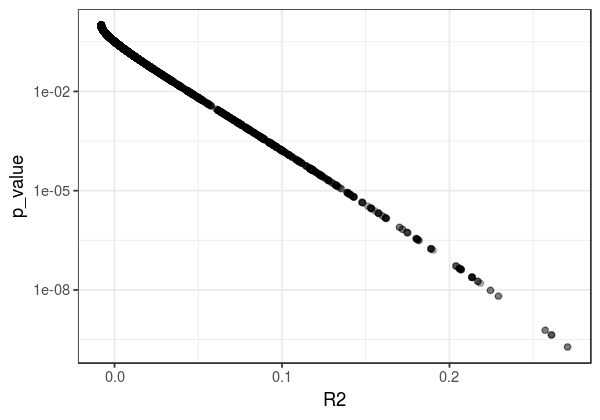

In [25]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3.5)
plot(p)

Warning message:
“Removed 76 rows containing missing values (geom_point).”

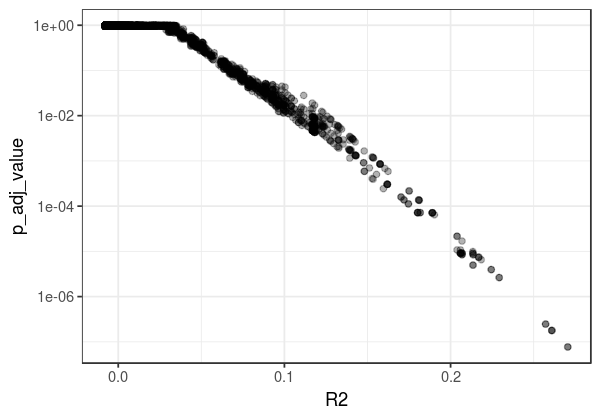

In [26]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, p_adj_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw() 

options(repr.plot.width=5, repr.plot.height=3.5)
plot(p)

### Significant taxa

In [27]:
pgls_res_sig = pgls_res %>%
    group_by(y) %>%
    summarize(
        qvalue = (length(p_adj_value) - sum(p_adj_value < 0.05)) / length(p_adj_value)
        ) %>%
    ungroup() %>%
    filter(qvalue < 0.05)

pgls_res_sig %>% dfhead

[1] 2 2


y,qvalue
f85d49c62606b3c0c1c26193b82042fd,0.03
X77de59bab34d87b768a33a0c345419b9,0.00


In [28]:
# getting all stats 
pgls_res_sig = pgls_res %>%
    semi_join(pgls_res_sig, c('y'))

pgls_res_sig %>% dfhead

[1] 200   9


Estimate,std_err,t_value,p_value,R2,x,y,rep,p_adj_value
0.6297347,0.09390671,6.705960,6.043039e-10,0.2571792,diet,X77de59bab34d87b768a33a0c345419b9,1,2.465560e-07
0.5584820,0.13157347,4.244640,4.210947e-05,0.1181595,diet,f85d49c62606b3c0c1c26193b82042fd,1,5.726888e-03
0.5392624,0.13457971,4.007011,1.045207e-04,0.1059872,diet,X77de59bab34d87b768a33a0c345419b9,2,1.414513e-02


#### Adding taxonomy

In [29]:
tax = physeq %>%
    tax_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.))

tax %>% dfhead

[1] 408   8


Domain,Phylum,Class,Order,Family,Genus,Species,OTU
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,368bd5c2255f3a5ce0fef06ca6de1d04
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,uncultured archaeon,779324e5648460c5a67e577c45131b42
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,uncultured archaeon,b918d185ee89a0b33d821ee766d76eb3


In [30]:
# adding taxonomy
pgls_res_sig = pgls_res_sig %>%
    mutate(OTU = gsub('^X([0-9])', '\\1', y)) %>%
    inner_join(tax, c('OTU')) %>%
    unite(taxonomy, Phylum, Class, Order, Family, Genus, OTU, sep=';', remove=FALSE) %>%
    mutate(taxonomy = gsub(' ', '_', taxonomy),
           taxonomy = gsub(';', '; ', taxonomy),
           taxonomy = stringr::str_wrap(taxonomy, 30))

pgls_res_sig %>% dfhead

[1] 200  18


Estimate,std_err,t_value,p_value,R2,x,y,rep,p_adj_value,taxonomy,OTU,Domain,Phylum,Class,Order,Family,Genus,Species
0.6297347,0.09390671,6.705960,6.043039e-10,0.2571792,diet,X77de59bab34d87b768a33a0c345419b9,1,2.465560e-07,Bacteroidetes; Bacteroidia; Bacteroidales; Bacteroidaceae; Bacteroides; 77de59bab34d87b768a33a0c345419b9,77de59bab34d87b768a33a0c345419b9,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,unclassified
0.5584820,0.13157347,4.244640,4.210947e-05,0.1181595,diet,f85d49c62606b3c0c1c26193b82042fd,1,5.726888e-03,Firmicutes; Clostridia; Clostridiales; Ruminococcaceae; uncultured; f85d49c62606b3c0c1c26193b82042fd,f85d49c62606b3c0c1c26193b82042fd,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured,unclassified
0.5392624,0.13457971,4.007011,1.045207e-04,0.1059872,diet,X77de59bab34d87b768a33a0c345419b9,2,1.414513e-02,Bacteroidetes; Bacteroidia; Bacteroidales; Bacteroidaceae; Bacteroides; 77de59bab34d87b768a33a0c345419b9,77de59bab34d87b768a33a0c345419b9,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,unclassified


#### Plotting

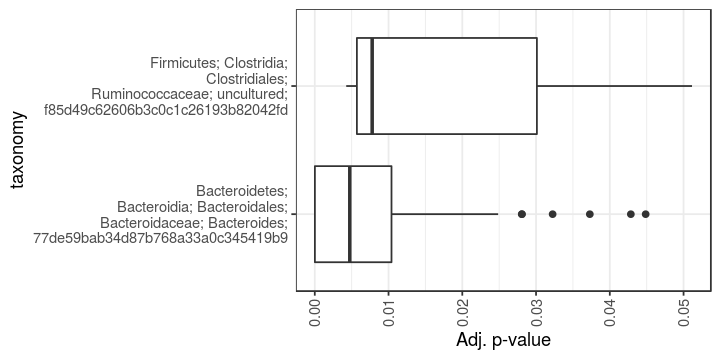

In [31]:
# adj-p-value dist
p = ggplot(pgls_res_sig, aes(taxonomy, p_adj_value)) +
    geom_boxplot() +
    labs(y='Adj. p-value') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
    
options(repr.plot.width=6, repr.plot.height=3)
plot(p)

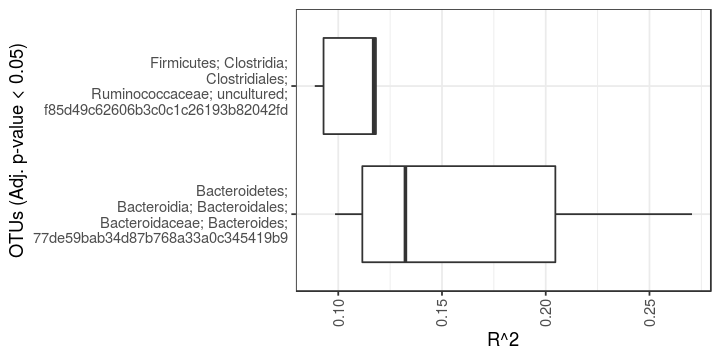

In [32]:
# R2 dist
p = ggplot(pgls_res_sig, aes(taxonomy, R2)) +
    geom_boxplot() +
    labs(x='OTUs (Adj. p-value < 0.05)', y='R^2') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
    
options(repr.plot.width=6, repr.plot.height=3)
plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS/.figures/IndD_OTU-binom_PGLS-diet.pdf 


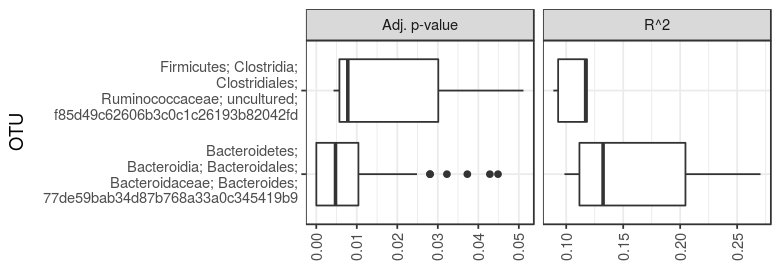

In [35]:
# combining and plotting
p = pgls_res_sig %>%
    dplyr::select(taxonomy, R2, p_adj_value) %>%
    gather(category, value, -taxonomy) %>%
    mutate(category = ifelse(category == 'R2', 'R^2', 'Adj. p-value')) %>%
    ggplot(aes(taxonomy, value)) +
    geom_boxplot() +
    labs(x='OTU', y='value') +
    coord_flip() +
    facet_grid(. ~ category, scales='free_x') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5),
        axis.title.x = element_blank()
    )

options(repr.plot.width=6.5, repr.plot.height=2.25)
plot_write(p, file='IndD_OTU-binom_PGLS-diet.pdf')

### Diet distribution of sig OTUs

In [99]:
to_keep = pgls_res_sig$y %>% unique %>% as.character
to_keep

[1] "X77de59bab34d87b768a33a0c345419b9" "f85d49c62606b3c0c1c26193b82042fd"

In [100]:
# phyloseq
otu = physeq %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = gsub('^([0-9])', 'X\\1', rownames(.))) %>%
    filter(OTU %in% to_keep) %>%
    gather(Sample, Count, -OTU) %>%
    inner_join(metadata %>% dplyr::select(X.SampleID, diet),
               c('Sample'='X.SampleID'))

otu %>% dfhead

[1] 426   4


OTU,Sample,Count,diet
X77de59bab34d87b768a33a0c345419b9,X1.Eurasian.Beaver,0,herbivore
f85d49c62606b3c0c1c26193b82042fd,X1.Eurasian.Beaver,0,herbivore
X77de59bab34d87b768a33a0c345419b9,X101.Horse,0,herbivore


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


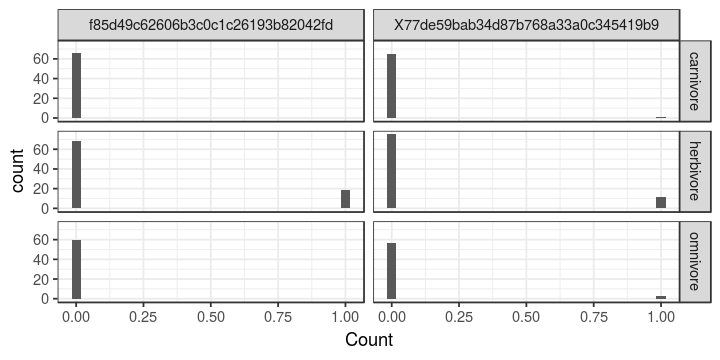

In [101]:
p = ggplot(otu, aes(Count)) +
    geom_histogram() +
    facet_grid(diet~OTU) +
    theme_bw()

plot(p)

### Host distribution of sig. OTUs

* Which hosts have these OTUs?

In [102]:
to_keep = pgls_res_sig$y %>% unique %>% as.character
to_keep

[1] "X77de59bab34d87b768a33a0c345419b9" "f85d49c62606b3c0c1c26193b82042fd"

In [103]:
# phyloseq
otu = physeq %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = gsub('^([0-9])', 'X\\1', rownames(.))) %>%
    filter(OTU %in% to_keep) %>%
    as.data.frame

rownames(otu) = otu$OTU
otu$OTU = NULL

otu %>% dfhead

[1]   2 213


,X1.Eurasian.Beaver,X101.Horse,X102.Kulan,X109.Red.Fox,X110.Noctule,X111.West.European.Hedgehog,X116.Common.Kestrel,X122.Wild.Boar,X123.Alpine.Chamois,X124.Golden.Jackal,⋯,F45.Red.Deer,F47.Red.Deer,F48.Red.Deer,F53.Mouflon,F66.Wild.Boar,F68.Red.Deer,F69.Red.Deer,F70.Red.Deer,F80.Red.Deer,F90.Domestic.Dog
X77de59bab34d87b768a33a0c345419b9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
f85d49c62606b3c0c1c26193b82042fd,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,0,1,1,1,1,0


In [104]:
htmp_file = file.path(work_dir, 'IndD_OTU-binom_PGLS-sig_itol-htmp.txt')
itol_heatmap(otu %>% t, 'PGLS_sig_OTUs', htmp_file)

Warning message in if (color_scheme == "color") {:
“the condition has length > 1 and only the first element will be used”

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS//IndD_OTU-binom_PGLS-sig_itol-htmp.txt 


# sessionInfo

In [61]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq_phylo/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq_phylo/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2.2  caper_1.0.1     mvtnorm_1.0-6   MASS_7.3-50    
 [5] ade4_1.7-11     phyloseq_1.22.3 ape_5.1         ggplot2_3.0.0  
 [9] tidyr_0.8.1     dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17        lattice_0.20-34     Biostrings_2.46.0  
 [4] assertthat_0.2.0    digest_0.6.15       foreach_1.4.4      
 [7] IRdisplay_0.4.4     R6_2.2.2            plyr_1.8.4         
[10] repr_0.15.0         stats4_3.4.1        evaluate_0.10.1    
[13] pillar_1.2.2        zlibbioc_1.24.0     rl